## Train different machine learning models for MNIST digit recognition
### 1. Random Forest
### 2. Decision Tree
### 3. Support vector Machine (SVM)
### 4. KNN
### 5. Logistic Regression

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#### Importing dataset

In [2]:
df = pd.read_csv('mnist_train.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print("Shape of dataset:",df.shape)

Shape of dataset: (60000, 785)


#### Description of dataset

In [4]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


#### Checking for null and np.nan values


In [6]:
print("Null values in training dataset:",df.isnull().sum())

Null values in training dataset: label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


#### Count the number of classes ie digits from 0-9 to idrentify any biasing towards a class by occurence/frequency


In [7]:
order = list(np.sort(df['label'].unique()))
print(order)
num = []
for i in range(0,10):
    num.append(len(df[df['label']==i]))
data = {"Digits" : order, "Count" : num}
df1 = pd.DataFrame(data=data)
df1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,Digits,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


#### Visualizing the number of class ie digits and counts in the datasets


Text(0.5, 1.0, 'Number of digit classes')

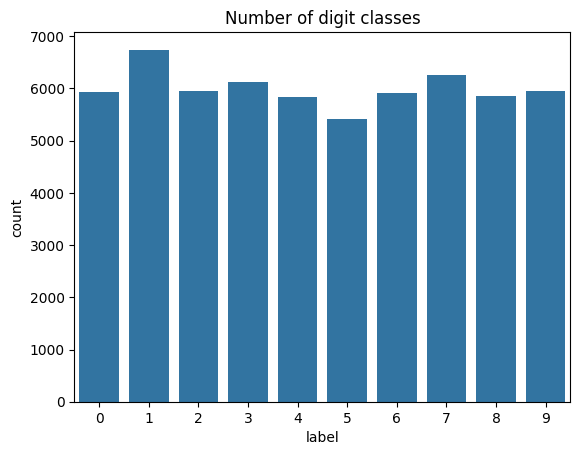

In [8]:
import seaborn as sns
plt.plot(figure = (16,10))
g = sns.countplot( x='label', data=df)
plt.title('Number of digit classes')

#### Separating the x and y variable (x=feature, y=target)


In [9]:
from timeit import default_timer as timer
start = timer()
x = df.drop(['label'], axis=1)
y = df['label']
print(x.shape)
print(y.shape)
print("Timer:- ", timer() - start)


(60000, 784)
(60000,)
Timer:-  0.30280740000011974


#### Normalization-- all values lie between 0 and 255 so by dividing all values by 255, they will lie between 0 and 1


In [11]:
x = x/255.0
print('x :', x.shape)

x : (60000, 784)


#### Feature scaling independent feature variable x


In [12]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x = scale.fit_transform(x)

#### Splitting dataset into training set and test set


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [15]:
print('Get size of xtrain : ', sys.getsizeof(x_train))
print('Get size of xtest : ', sys.getsizeof(x_test))
print('Get size of y_train : ', sys.getsizeof(y_train))
print('Get size of y_test : ', sys.getsizeof(y_test))

Get size of xtrain :  301056128
Get size of xtest :  75264128
Get size of y_train :  768016
Get size of y_test :  192016


#### Train machine learning models (Random Forest, Decision Tree, SVM, KNN, Logistic Regression) on MNIST training data


In [16]:
def train_mnist_model(x_train, y_train):
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=3, max_features='sqrt', 
                                               min_samples_leaf=4, bootstrap=True, n_jobs=-1, random_state=0),
        "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=3,random_state=100),
        "SVM": SVC(kernel="rbf"),
        "k-NN": KNeighborsClassifier(n_neighbors=5),
        "Logistic Regression": LogisticRegression(max_iter=100)
    }
    trained_models = {}
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        trained_models[model_name] = model
    
    return trained_models

#### Test and evaluate models on MNIST test data


In [17]:
def test_and_evaluate_mnist_model(models, x_test, y_test):
    results = {}
    for model_name, model in models.items():
        y_pred = model.predict(x_test)
        # Evaluate models
        confusionmatrix = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1score = f1_score(y_test, y_pred, average='macro')
        classificationReport = classification_report(y_test, y_pred)
        results[model_name] = {
            "Confusion Matrix": confusionmatrix,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 score": f1score,
            "Classification Report": classificationReport
            }
    return results

In [18]:
trained_models = train_mnist_model(x_train, y_train)

c:\users\real\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from timeit import default_timer as timer
start = timer()
evaluation_results = test_and_evaluate_mnist_model(trained_models, x_test, y_test)
print("Timer:- ", timer() - start)

c:\users\real\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\real\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\real\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

Timer:-  188.77880480000022


In [20]:
from timeit import default_timer as timer
start = timer()
for model_name, metrics in evaluation_results.items():
        print(f"{model_name} Evaluation \n")
        print("\n***************************Confusion Matrix***************************\n")
        print(metrics['Confusion Matrix'])
        print(f"Accuracy: {metrics['Accuracy']:.2f}")
        print(f"Precision: {metrics['Precision']:.2f}")
        print(f"Recall: {metrics['Recall']:.2f}")
        print(f"F1 score: {metrics['F1 score']:.2f}")
        print("\n***************************Classification Report***************************\n")
        print(metrics['Classification Report'])
        print()
        # Save the trained models to files
        import joblib
        model_filename = f"{model_name.lower().replace(' ', '_')}_mnist_model.pkl"
        joblib.dump(trained_models[model_name], model_filename)
print("Timer:- ", timer() - start)

Random Forest Evaluation 


***************************Confusion Matrix***************************

[[1131    2    4    3    1    0   21    3   19    1]
 [   0 1327    5    0    0    2    2    6    3    3]
 [  53  156  841    9   16    1   51   39   24    2]
 [  49  121   45  892    1    3   11   36   30   38]
 [  14   20    5    2  946    0   43   41    5   92]
 [  96   87    6  337   55  297   37   42   43   84]
 [  63   67   42    5   44    1  938   11   11    2]
 [  17   52   23    1   13    0    0 1107   10   30]
 [   9  170   39   65   15    5   27   15  759   66]
 [  14   23    9   15   95    0    5  166    6  857]]
Accuracy: 0.76
Precision: 0.78
Recall: 0.75
F1 score: 0.74

***************************Classification Report***************************

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1185
           1       0.66      0.98      0.79      1348
           2       0.83      0.71      0.76      1192
           3   

#### Find the model with the highest accuracy

In [31]:
best_model_name = max(evaluation_results, key=lambda model: evaluation_results[model]["Accuracy"])
best_model_accuracy = evaluation_results[best_model_name]["Accuracy"]
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}")


The best model is SVM with an accuracy of 0.98


#### Make visualization of models

##### Extract model names and their corresponding evaluation values

In [27]:
model_names = list(evaluation_results.keys())
accuracies = [results["Accuracy"] for results in evaluation_results.values()]
precisions = [results["Precision"] for results in evaluation_results.values()]
recalls = [results["Recall"] for results in evaluation_results.values()]

##### Create a bar plot to visualize the accuracy of each model


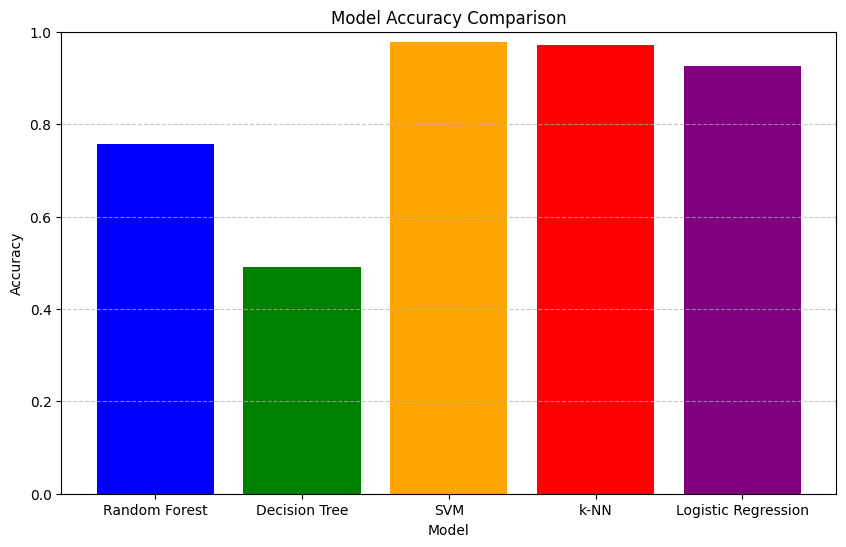

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Create a bar plot to visualize the precision of each model

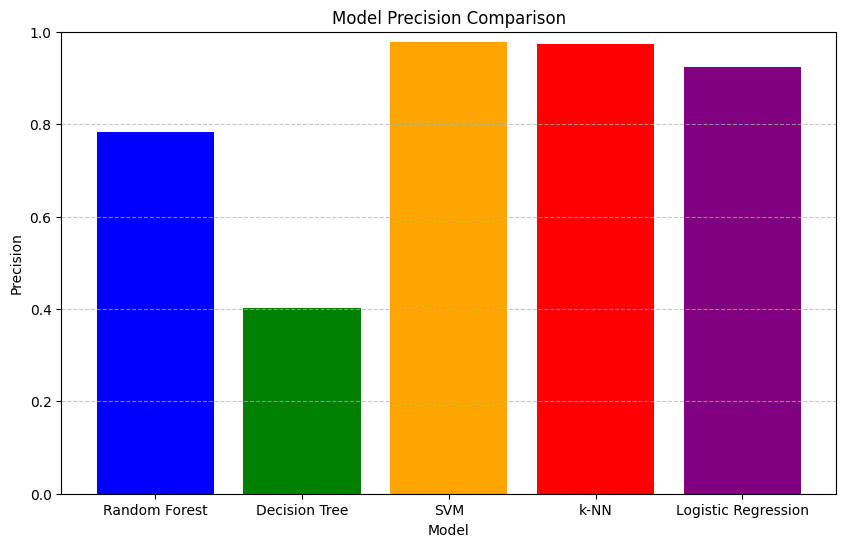

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, precisions, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Precision")
plt.title("Model Precision Comparison")
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Create a bar plot to visualize the recall of each model

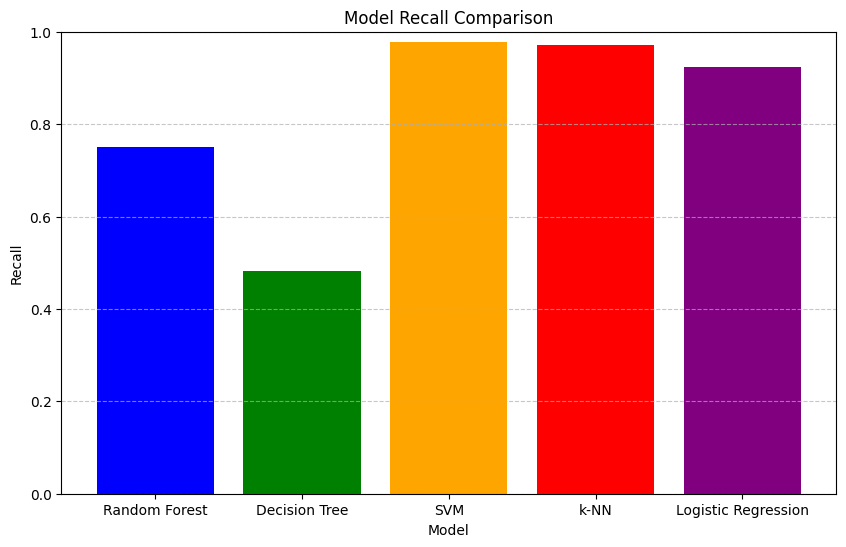

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, recalls, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Model Recall Comparison")
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
